In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
%matplotlib inline


In [2]:
bitcoin_tweets_df = pd.read_csv("./Resources/df_Final.csv", sep=';')
bitcoin_tweets_df.head(5)


,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),"Volume (Currency),,"
0,2017-08-01 00:00:00,0.082893,1027.0,139.0,347.0,397.0,-0.516620,0.417882,695.0,144.0,2855.81,2863.06,2823.00,2825.92,184.02,"522951,0,"
1,2017-08-01 01:00:00,0.053160,778.0,111.0,193.0,320.0,-0.423402,0.415385,493.0,154.0,2823.01,2860.02,2821.01,2853.38,77.3,"219605.16,,"
2,2017-08-01 02:00:00,0.124251,836.0,89.0,273.0,264.0,-0.440938,0.428661,510.0,210.0,2846.27,2858.04,2837.31,2841.60,135.83,"386739.15,,"
3,2017-08-01 03:00:00,-0.021037,984.0,250.0,236.0,314.0,-0.441173,0.396034,683.0,184.0,2841.84,2863.88,2837.73,2862.93,143.2,"408360.03,,"
4,2017-08-01 04:00:00,0.055437,751.0,114.0,195.0,305.0,-0.414978,0.417159,517.0,137.0,2862.92,2876.00,2848.11,2874.99,222.53,"637045.88,,"


In [3]:
# get end of day price and tweet count
end_price = bitcoin_tweets_df[bitcoin_tweets_df['Date'].str.contains('23:00:00')]


In [4]:
end_price.head(3)


,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),"Volume (Currency),,"
23,2017-08-01 23:00:00,0.028798,1282.0,212.0,244.0,569.0,-0.355163,0.429558,887.0,257.0,2699.93,2733.05,2691.37,2731.00,268.66,"729341.39,,"
47,2017-08-02 23:00:00,0.071469,929.0,116.0,215.0,342.0,-0.393938,0.436258,561.0,256.0,2687.10,2706.00,2676.70,2703.51,310.24,"834351.39,,"
71,2017-08-03 23:00:00,0.102485,830.0,58.0,174.0,260.0,-0.463467,0.444273,428.0,338.0,2800.00,2805.00,2781.00,2793.37,281.97,"787235.07,,"


In [5]:
end_price['Close']



23       2731.00
47       2703.51
71       2793.37
95       2855.00
119      3263.62
          ...   
12839    3682.51
12863    3647.29
12887    3732.40
12911    3568.27
12935    3573.67
Name: Close, Length: 539, dtype: float64

In [6]:
# remove ',,' and ',0,' from volume in dollars column
bitcoin_tweets_df['Volume (Currency),,'] = bitcoin_tweets_df['Volume (Currency),,'].str.replace(',,', ' ')
bitcoin_tweets_df['Volume (Currency),,'] = bitcoin_tweets_df['Volume (Currency),,'].str.replace(',0,', ' ')

In [7]:
bitcoin_tweets_df[['Date', 'Time']] = bitcoin_tweets_df['Date'].str.split(' ', expand=True)

In [8]:
# get end of day closing price 
end_of_day = bitcoin_tweets_df[bitcoin_tweets_df['Time'].str.contains('23:00:00')]

In [9]:
end_of_day.head(3)

,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),"Volume (Currency),,",Time
23,2017-08-01,0.028798,1282.0,212.0,244.0,569.0,-0.355163,0.429558,887.0,257.0,2699.93,2733.05,2691.37,2731.00,268.66,729341.39,23:00:00
47,2017-08-02,0.071469,929.0,116.0,215.0,342.0,-0.393938,0.436258,561.0,256.0,2687.10,2706.00,2676.70,2703.51,310.24,834351.39,23:00:00
71,2017-08-03,0.102485,830.0,58.0,174.0,260.0,-0.463467,0.444273,428.0,338.0,2800.00,2805.00,2781.00,2793.37,281.97,787235.07,23:00:00


In [10]:
total_negative = bitcoin_tweets_df.groupby('Date')['Count_Negatives'].sum()
total_positive = bitcoin_tweets_df.groupby('Date')['Count_Positives'].sum()
total_neutral = bitcoin_tweets_df.groupby('Date')['Count_Neutrals'].sum()
close_price = end_of_day.set_index('Date')['Close']
tweet_vol = bitcoin_tweets_df.groupby('Date')['Total Volume of Tweets'].sum()
date = bitcoin_tweets_df['Date'].unique()
# trading_vol = bitcoin_tweets_df.groupby('Date')['Volume (Currency),,'].sum().astype(float)

tweets_dict = {'Closing Price': close_price, 
               'Positive Tweets': total_positive, 
               'Negative Tweets': total_negative, 
               'Neutral Tweets': total_neutral, 
               'Total Volume of Tweets': tweet_vol}

tweets_df = pd.DataFrame(tweets_dict)
tweets_df.tail(5)

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets
Date,,,,,
2019-01-17,3682.51,7202.0,3648.0,7294.0,21758.0
2019-01-18,3647.29,6999.0,3557.0,7631.0,23361.0
2019-01-19,3732.40,6474.0,2634.0,5650.0,18587.0
2019-01-20,3568.27,5856.0,2928.0,5292.0,17645.0
2019-01-21,3573.67,7321.0,3671.0,6783.0,21341.0


In [11]:
# plt.plot(date, close_price, color="green", label="BTC Price")
# plt.plot(date, total_negative, color="red", label="Negative Tweets")
# plt.plot(date, total_positive, color="blue", label="Postive Tweets")
# plt.plot(date, total_neutral, color="orange", label="Neutral Tweets")
# plt.figure(figsize=(20, 8))

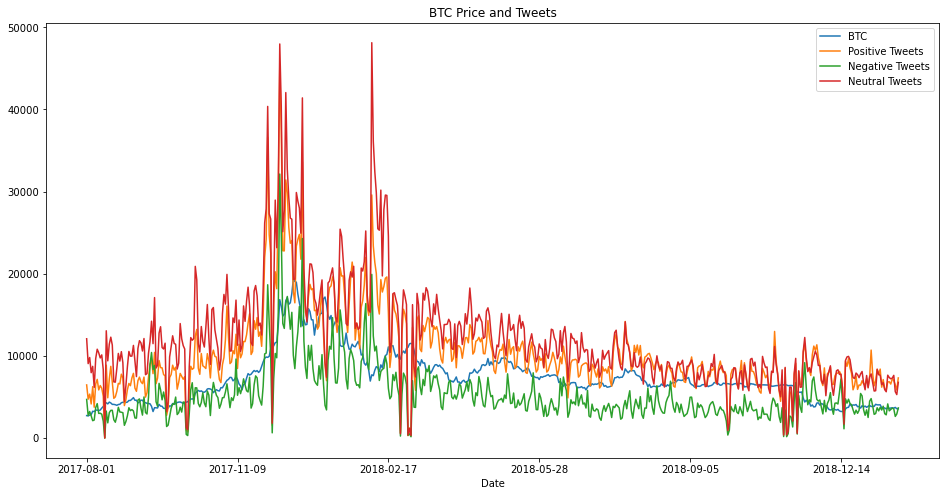

In [12]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price and Tweets')
tweets_df['Positive Tweets'].plot(label='Positive Tweets')
tweets_df['Negative Tweets'].plot(label='Negative Tweets')
tweets_df['Neutral Tweets'].plot(label='Neutral Tweets')
plt.legend()
plt.show()

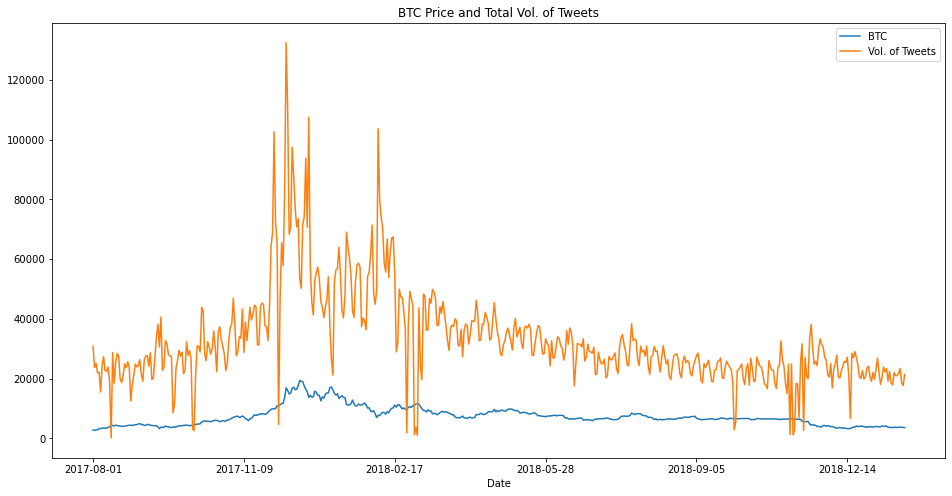

In [13]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price and Total Vol. of Tweets')
tweets_df['Total Volume of Tweets'].plot(label='Vol. of Tweets')
plt.legend()
plt.show()

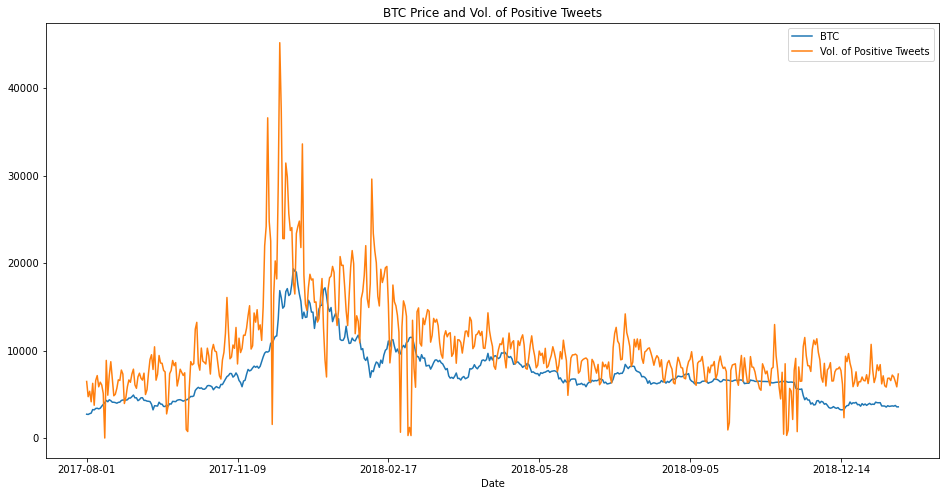

In [14]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price and Vol. of Positive Tweets')
tweets_df['Positive Tweets'].plot(label='Vol. of Positive Tweets')
plt.legend()
plt.show()

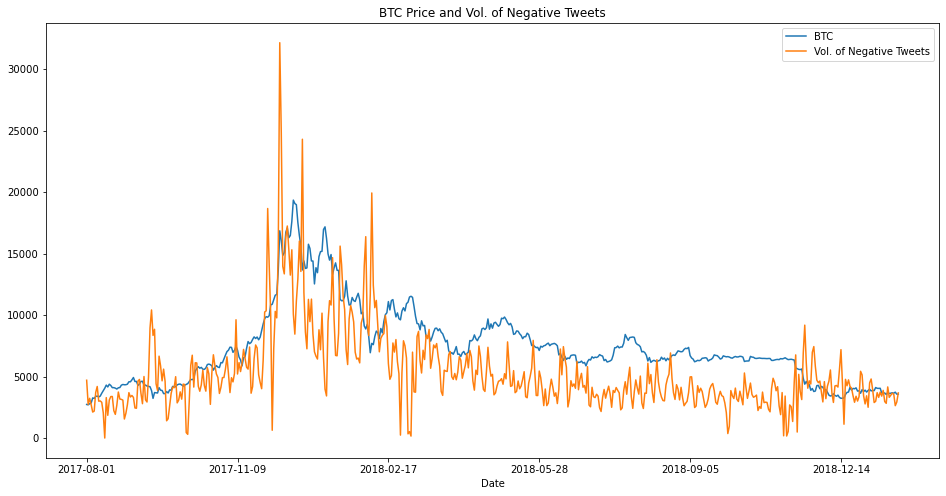

In [15]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price and Vol. of Negative Tweets')
tweets_df['Negative Tweets'].plot(label='Vol. of Negative Tweets')
plt.legend()
plt.show()

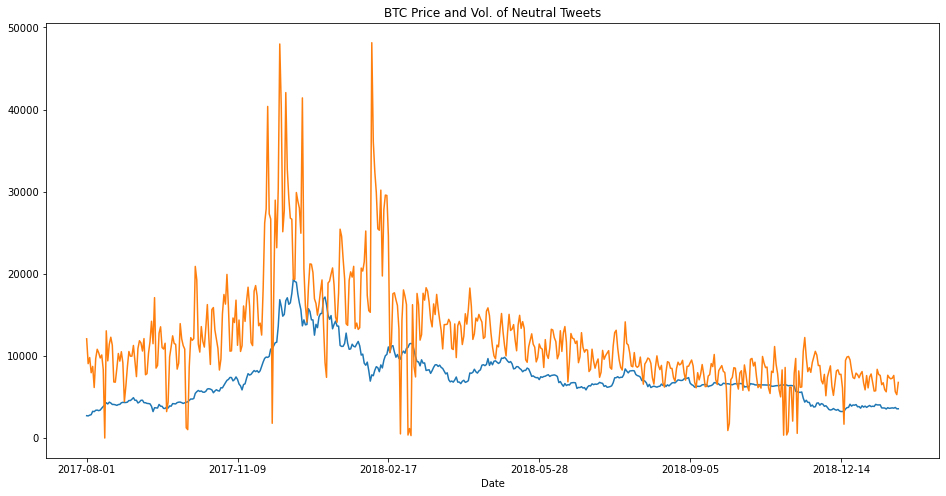

In [16]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price and Vol. of Neutral Tweets')
tweets_df['Neutral Tweets'].plot(label='Vol. of Neutral Tweets')
correlation = tweets_df['Neutral Tweets'].corr(tweets_df['Closing Price'])

In [17]:
year = bitcoin_tweets_df.iloc[:, 0]

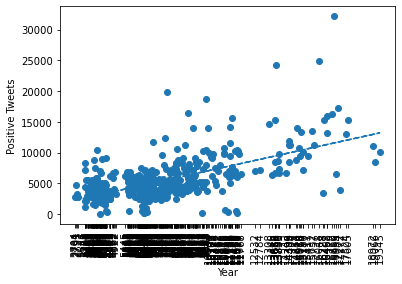

In [18]:
# postive tweets
year = tweets_df.iloc[:, 0]
positive_tweets = tweets_df.iloc[:, 2]
negative_tweets = tweets_df.iloc[:, 3]
btc_price = tweets_df.iloc[:, 1]
#neutral_tweets = tweets_df.iloc[:, 4]

pt_slope, pt_int, pt_r, pt_p, pt_std_err = stats.linregress(
    year, positive_tweets)

pt_fit = pt_slope * year + pt_int

plt.scatter(year, positive_tweets)
plt.plot(year, pt_fit,"--") # dotted line
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Positive Tweets')
plt.show()

In [19]:
btc_usdDF = pd.read_csv("./Resources/BTC-USD.csv")
btc_usdDF.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-01,2871.300049,2921.350098,2685.610107,2718.260010,2718.260010,1324669952
1,2017-08-02,2727.129883,2762.530029,2668.590088,2710.669922,2710.669922,1094950016
2,2017-08-03,2709.560059,2813.310059,2685.139893,2804.729980,2804.729980,804796992


In [20]:
btc_usdDF['Volume'].astype(float)

0      1.324670e+09
1      1.094950e+09
2      8.047970e+08
3      1.002120e+09
4      1.945700e+09
           ...     
534    5.464420e+09
535    5.002962e+09
536    5.955691e+09
537    5.582490e+09
538    5.004347e+09
Name: Volume, Length: 539, dtype: float64

In [21]:
tweets_df['Volume'] = list(btc_usdDF['Volume'])

In [22]:
#tweets_df['Volume'] =volume

tweets_df['Volume'].astype(float)

Date
2017-08-01    1.324670e+09
2017-08-02    1.094950e+09
2017-08-03    8.047970e+08
2017-08-04    1.002120e+09
2017-08-05    1.945700e+09
                  ...     
2019-01-17    5.464420e+09
2019-01-18    5.002962e+09
2019-01-19    5.955691e+09
2019-01-20    5.582490e+09
2019-01-21    5.004347e+09
Name: Volume, Length: 539, dtype: float64

In [23]:
tweets_df.head(3)

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets,Volume
Date,,,,,,
2017-08-01,2731.00,6471.0,4701.0,12089.0,30802.0,1324669952
2017-08-02,2703.51,4734.0,2732.0,9063.0,23726.0,1094950016
2017-08-03,2793.37,5351.0,3233.0,9806.0,25111.0,804796992


In [24]:
tweets_df['Closing Price'] =tweets_df['Closing Price'].map('{:.2f}'.format )
tweets_df['Positive Tweets']=tweets_df['Positive Tweets'].map('{:.2f}'.format )
tweets_df['Negative Tweets']=tweets_df['Negative Tweets'].map('{:.2f}'.format )
tweets_df['Total Volume of Tweets']=tweets_df['Total Volume of Tweets'].map('{:.2f}'.format )
tweets_df['Neutral Tweets']=tweets_df['Neutral Tweets'].map('{:.2f}'.format )
tweets_df['Volume']=tweets_df['Volume'].map('{:.2f}'.format )

In [25]:
tweets_df.head(2)

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets,Volume
Date,,,,,,
2017-08-01,2731.00,6471.00,4701.00,12089.00,30802.00,1324669952.00
2017-08-02,2703.51,4734.00,2732.00,9063.00,23726.00,1094950016.00


In [26]:
tweets_df['Volume'] =tweets_df['Volume'].astype(float)

In [27]:
tweets_df['Negative Tweets'] = tweets_df['Negative Tweets'].astype(float)

In [28]:
tweets_df['Positive Tweets'] = tweets_df['Positive Tweets'].astype(float)

In [29]:
tweets_df['Neutral Tweets'] = tweets_df['Neutral Tweets'].astype(float)

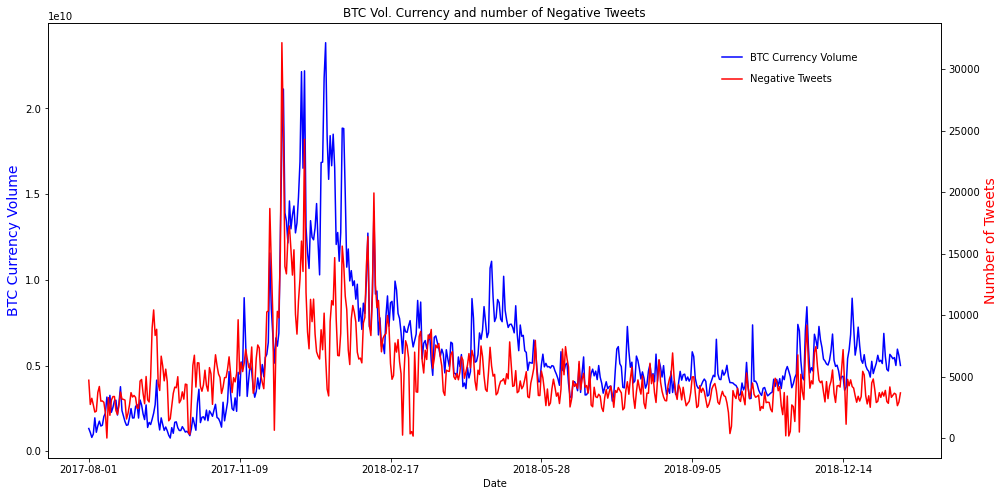

In [30]:

ax1 = tweets_df['Volume'].plot(label='BTC Currency Volume', figsize=(16, 8),color="blue", title='BTC Vol. Currency and number of Negative Tweets')
ax1.set_ylabel("BTC Currency Volume",color="blue",fontsize=14)
plt.legend()
ax2 = ax1.twinx()
ax2 = tweets_df['Negative Tweets'].plot(color = 'red', figsize=(16, 8))
ax2.set_ylabel("Number of Tweets",color="red",fontsize=14)
plt.legend()
ax1.legend(loc = (.75,.9), frameon = False)
ax2.legend( loc = (.75, .85), frameon = False)


plt.show()



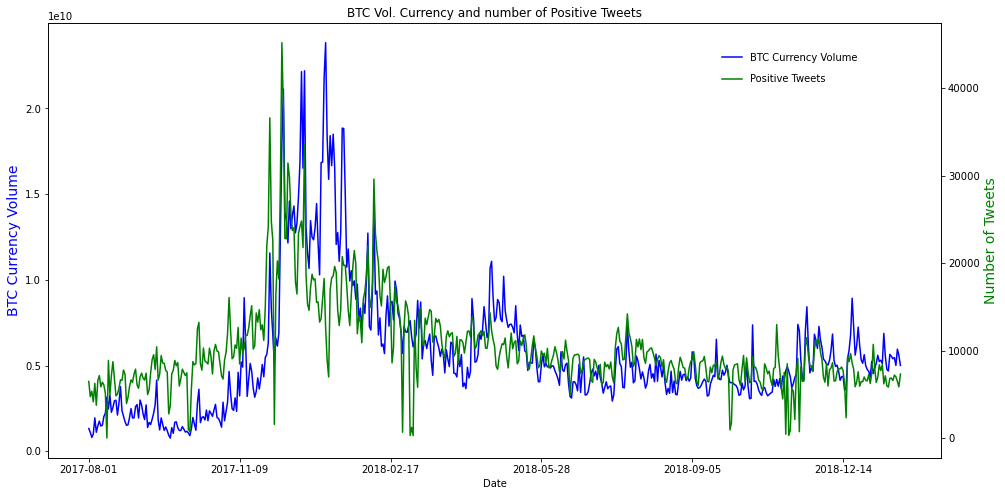

In [31]:
ax3 = tweets_df['Volume'].plot(label='BTC Currency Volume', figsize=(16, 8),color="blue", title='BTC Vol. Currency and number of Positive Tweets')
ax3.set_ylabel("BTC Currency Volume",color="blue",fontsize=14)
plt.legend()
ax4 = ax3.twinx()
ax4 = tweets_df['Positive Tweets'].plot(label = 'Positive Tweets',color = 'green', figsize=(16, 8))

ax4.set_ylabel("Number of Tweets",color="green",fontsize=14)

plt.legend()
ax3.legend(loc = (.75,.9), frameon = False)
ax4.legend( loc = (.75, .85), frameon = False)

plt.show()


In [32]:
tweets_df

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets,Volume
Date,,,,,,
2017-08-01,2731.00,6471.0,4701.0,12089.0,30802.00,1.324670e+09
2017-08-02,2703.51,4734.0,2732.0,9063.0,23726.00,1.094950e+09
2017-08-03,2793.37,5351.0,3233.0,9806.0,25111.00,8.047970e+08
2017-08-04,2855.00,4150.0,2703.0,7959.0,21863.00,1.002120e+09
2017-08-05,3263.62,6258.0,2115.0,8731.0,22123.00,1.945700e+09
...,...,...,...,...,...,...
2019-01-17,3682.51,7202.0,3648.0,7294.0,21758.00,5.464420e+09
2019-01-18,3647.29,6999.0,3557.0,7631.0,23361.00,5.002962e+09
2019-01-19,3732.40,6474.0,2634.0,5650.0,18587.00,5.955691e+09


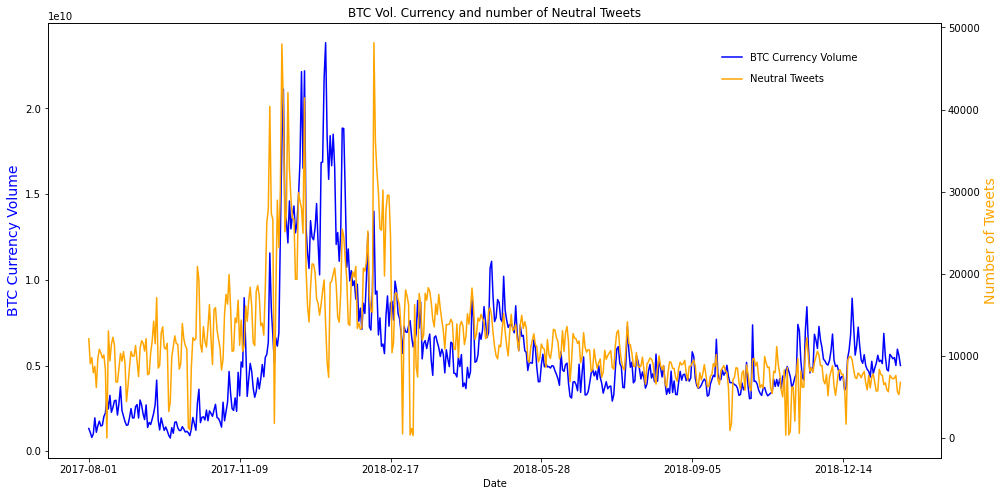

In [33]:
ax5 = tweets_df['Volume'].plot(label='BTC Currency Volume', figsize=(16, 8),color="blue", title='BTC Vol. Currency and number of Neutral Tweets')
ax5.set_ylabel("BTC Currency Volume",color="blue",fontsize=14)
plt.legend()
ax6 = ax5.twinx()
ax6 = tweets_df['Neutral Tweets'].plot(label = 'Neutral Tweets',color = 'orange', figsize=(16, 8))

ax6.set_ylabel("Number of Tweets",color="orange",fontsize=14)

plt.legend()
ax5.legend(loc = (.75,.9), frameon = False)
ax6.legend( loc = (.75, .85), frameon = False)

plt.show()



In [34]:
tweets_df

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets,Volume
Date,,,,,,
2017-08-01,2731.00,6471.0,4701.0,12089.0,30802.00,1.324670e+09
2017-08-02,2703.51,4734.0,2732.0,9063.0,23726.00,1.094950e+09
2017-08-03,2793.37,5351.0,3233.0,9806.0,25111.00,8.047970e+08
2017-08-04,2855.00,4150.0,2703.0,7959.0,21863.00,1.002120e+09
2017-08-05,3263.62,6258.0,2115.0,8731.0,22123.00,1.945700e+09
...,...,...,...,...,...,...
2019-01-17,3682.51,7202.0,3648.0,7294.0,21758.00,5.464420e+09
2019-01-18,3647.29,6999.0,3557.0,7631.0,23361.00,5.002962e+09
2019-01-19,3732.40,6474.0,2634.0,5650.0,18587.00,5.955691e+09


In [35]:
# define
date = bitcoin_tweets_df["Date"]

count_negatives = bitcoin_tweets_df["Count_Negatives"]
count_positives = bitcoin_tweets_df["Count_Positives"]
count_neutrals = bitcoin_tweets_df["Count_Neutrals"]
pd.options.display.float_format = '{:,.0f}'.format

# Show total number of observations, postive, negative, and neutral
df = bitcoin_tweets_df

obs_time = len(df["Date"].unique())
postive_total = count_positives.sum()
negative_total = df["Count_Negatives"].sum()
neutral_total = df["Count_Neutrals"].sum()

summary_df = pd.DataFrame({"Observations": [obs_time],
                                "Postive Total": [postive_total],
                                "Negative Total":[negative_total],
                                "Neutral Total": [neutral_total]})
print(summary_df)

   Observations  Postive Total  Negative Total  Neutral Total
0           539      5,569,049       2,857,409      6,543,282


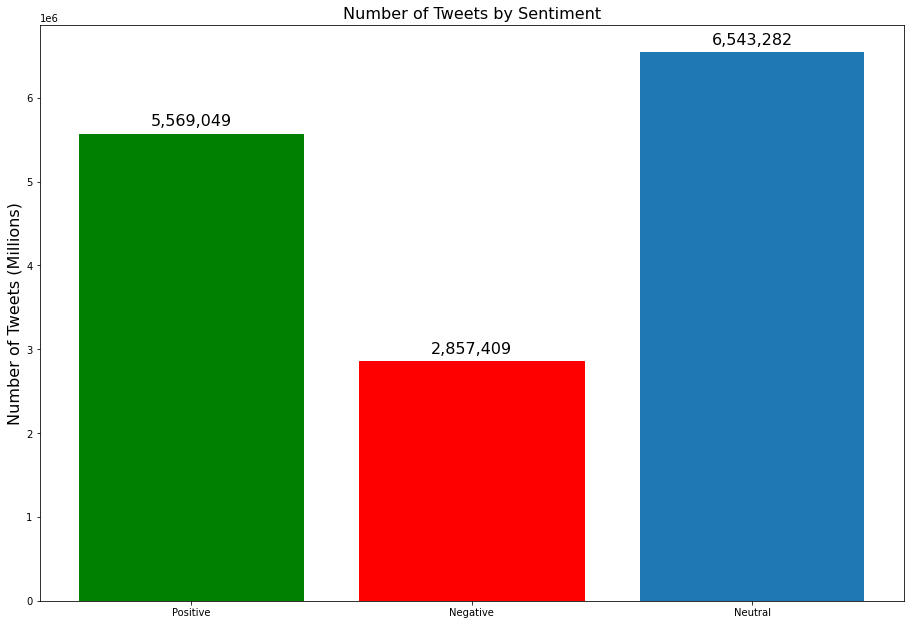

In [36]:
#Define axis
x_axis = ["Positive", "Negative","Neutral"]
y_axis = [postive_total,negative_total,neutral_total]
#setup barchart
fig = plt.figure()
#ax.bar(x,height,width,bottom,align)
ax = fig.add_axes([2,2,2,2])
barchart = plt.bar(x_axis,y_axis)
#format barchart
barchart[0].set_color('g')
barchart[1].set_color('r')
ax.set_xticks(x_axis)
ax.set_xticklabels(x_axis)
plt.title("Number of Tweets by Sentiment",fontsize=16)
plt.ylabel('Number of Tweets (Millions)',fontsize=16)
plt.rcParams.update({'font.size': 16})

#add bar value labels

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:,.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("image.png")

In [37]:
tweets_df

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets,Volume
Date,,,,,,
2017-08-01,2731.00,"6,471","4,701","12,089",30802.00,"1,324,669,952"
2017-08-02,2703.51,"4,734","2,732","9,063",23726.00,"1,094,950,016"
2017-08-03,2793.37,"5,351","3,233","9,806",25111.00,"804,796,992"
2017-08-04,2855.00,"4,150","2,703","7,959",21863.00,"1,002,120,000"
2017-08-05,3263.62,"6,258","2,115","8,731",22123.00,"1,945,699,968"
...,...,...,...,...,...,...
2019-01-17,3682.51,"7,202","3,648","7,294",21758.00,"5,464,420,383"
2019-01-18,3647.29,"6,999","3,557","7,631",23361.00,"5,002,961,727"
2019-01-19,3732.40,"6,474","2,634","5,650",18587.00,"5,955,691,380"


In [38]:
total_negative = bitcoin_tweets_df.groupby('Date')['Count_Negatives'].sum()
total_positive = bitcoin_tweets_df.groupby('Date')['Count_Positives'].sum()
total_neutral = bitcoin_tweets_df.groupby('Date')['Count_Neutrals'].sum()
compound_score = bitcoin_tweets_df.groupby('Date')['Compound_Score'].sum()
close_price = end_of_day.set_index('Date')['Close']
tweet_vol = bitcoin_tweets_df.groupby('Date')['Total Volume of Tweets'].sum()
date = bitcoin_tweets_df['Date'].unique()
volume_bitcoin = tweets_df['Volume']

# trading_vol = bitcoin_tweets_df.groupby('Date')['Volume (Currency),,'].sum().astype(float)

tweets_dict = {'Closing Price': close_price, 
               'Positive Tweets': total_positive, 
               'Negative Tweets': total_negative, 
               'Neutral Tweets': total_neutral, 
               'Total Volume of Tweets': tweet_vol,
                'Compound Score': compound_score,
                'Volume': volume_bitcoin}

tweets_df = pd.DataFrame(tweets_dict)
tweets_df

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets,Compound Score,Volume
Date,,,,,,,
2017-08-01,"2,731","6,471","4,701","12,089","30,802",1,"1,324,669,952"
2017-08-02,"2,704","4,734","2,732","9,063","23,726",1,"1,094,950,016"
2017-08-03,"2,793","5,351","3,233","9,806","25,111",1,"804,796,992"
2017-08-04,"2,855","4,150","2,703","7,959","21,863",1,"1,002,120,000"
2017-08-05,"3,264","6,258","2,115","8,731","22,123",2,"1,945,699,968"
...,...,...,...,...,...,...,...
2019-01-17,"3,683","7,202","3,648","7,294","21,758",3,"5,464,420,383"
2019-01-18,"3,647","6,999","3,557","7,631","23,361",3,"5,002,961,727"
2019-01-19,"3,732","6,474","2,634","5,650","18,587",3,"5,955,691,380"


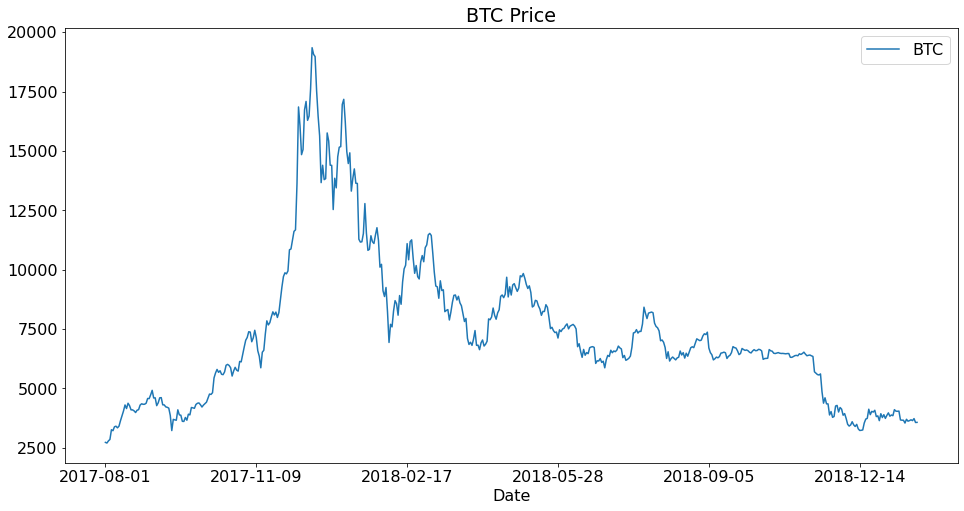

In [39]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price')
plt.legend()
plt.show()

In [40]:
df_new = pd.DataFrame()
df_new['Lag Total Tweets'] = tweets_df["Total Volume of Tweets"].shift(-1)
df_new['Lag Closing Price'] = tweets_df["Closing Price"].shift(-1)
df_new['Lag Positive'] = tweets_df["Positive Tweets"].shift(-1)
df_new['Lag Negative'] = tweets_df["Negative Tweets"].shift(-1)
df_new['Lag Neutral'] = tweets_df["Neutral Tweets"].shift(-1)
df_new['Lag Volume'] = tweets_df['Volume'].shift(-1)
df_new['Closing Price'] = tweets_df["Closing Price"]
df_new['Total Tweets'] = tweets_df["Total Volume of Tweets"]
df_new['Volume'] = tweets_df["Volume"]
df_new
df_new_edit= df_new.dropna()
df_new_edit

lag_tweets =df_new_edit['Lag Total Tweets']
lag_price = df_new_edit['Lag Closing Price']
close_price = df_new_edit['Closing Price']
total_tweets = df_new_edit['Total Tweets']
df_new_edit

,Lag Total Tweets,Lag Closing Price,Lag Positive,Lag Negative,Lag Neutral,Lag Volume,Closing Price,Total Tweets,Volume
Date,,,,,,,,,
2017-08-01,"23,726","2,704","4,734","2,732","9,063","1,094,950,016","2,731","30,802","1,324,669,952"
2017-08-02,"25,111","2,793","5,351","3,233","9,806","804,796,992","2,704","23,726","1,094,950,016"
2017-08-03,"21,863","2,855","4,150","2,703","7,959","1,002,120,000","2,793","25,111","804,796,992"
2017-08-04,"22,123","3,264","6,258","2,115","8,731","1,945,699,968","2,855","21,863","1,002,120,000"
2017-08-05,"15,469","3,223","3,754","2,190","6,161","1,105,030,016","3,264","22,123","1,945,699,968"
...,...,...,...,...,...,...,...,...,...
2019-01-16,"21,758","3,683","7,202","3,648","7,294","5,464,420,383","3,647","20,960","5,394,457,145"
2019-01-17,"23,361","3,647","6,999","3,557","7,631","5,002,961,727","3,683","21,758","5,464,420,383"
2019-01-18,"18,587","3,732","6,474","2,634","5,650","5,955,691,380","3,647","23,361","5,002,961,727"


In [41]:
#Lag of Closing Price on Closing Price. Note: It's a high R-squared but does not tell us about Twitter's impact
from scipy.stats import linregress
x_axis = df_new_edit['Lag Closing Price']
y_axis = close_price
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
model = (slope, intercept, rvalue, pvalue, stderr)
regression = x_axis * slope + intercept
#print(model)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("R-Squared:",str(round(rvalue,10)))

y = 0.99x + 67.41
R-Squared: 0.9899187198


In [42]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [43]:
X = df_new_edit[['Lag Closing Price','Lag Total Tweets']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_new_edit['Closing Price']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 74.65766415595135
Coefficients: 
 [ 9.93779457e-01 -9.32379251e-04]
                            OLS Regression Results                            
Dep. Variable:          Closing Price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.308e+04
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:01:47   Log-Likelihood:                -4042.7
No. Observations:                 538   AIC:                             8091.
Df Residuals:                     535   BIC:                             8104.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [44]:
X = df_new_edit[['Lag Closing Price','Total Tweets']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_new_edit['Closing Price']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 56.320214782278526
Coefficients: 
 [0.98565323 0.0014315 ]
                            OLS Regression Results                            
Dep. Variable:          Closing Price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.309e+04
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:01:47   Log-Likelihood:                -4042.5
No. Observations:                 538   AIC:                             8091.
Df Residuals:                     535   BIC:                             8104.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [45]:
X = df_new_edit[['Lag Closing Price','Lag Positive', 'Lag Negative','Lag Neutral']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_new_edit['Closing Price']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 134.17489111548548
Coefficients: 
 [ 1.00049075 -0.02689699  0.07174086 -0.01990458]
                            OLS Regression Results                            
Dep. Variable:          Closing Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     6821.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:01:47   Log-Likelihood:                -4030.6
No. Observations:                 538   AIC:                             8071.
Df Residuals:                     533   BIC:                             8093.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [46]:
df_log = pd.DataFrame()
df_log['Lag Total Tweets']= np.log(df_new_edit['Lag Total Tweets'])
df_log['Lag Closing Price']=np.log(df_new_edit['Lag Closing Price'])
df_log['Lag Positive'] = np.log(df_new_edit['Lag Positive'])
df_log['Lag Negative'] =np.log(df_new_edit['Lag Negative'])
df_log['Lag Neutral']= np.log(df_new_edit['Lag Neutral'])
df_log['Lag Volume']=np.log(df_new_edit['Lag Volume'])
df_log['Closing Price']= np.log(df_new_edit['Closing Price'])
df_log['Total Tweets']= np.log(df_new_edit['Total Tweets'])
df_log['Volume']= np.log(df_new_edit['Volume'])
df_log

,Lag Total Tweets,Lag Closing Price,Lag Positive,Lag Negative,Lag Neutral,Lag Volume,Closing Price,Total Tweets,Volume
Date,,,,,,,,,
2017-08-01,10,8,8,8,9,21,8,10,21
2017-08-02,10,8,9,8,9,21,8,10,21
2017-08-03,10,8,8,8,9,21,8,10,21
2017-08-04,10,8,9,8,9,21,8,10,21
2017-08-05,10,8,8,8,9,21,8,10,21
...,...,...,...,...,...,...,...,...,...
2019-01-16,10,8,9,8,9,22,8,10,22
2019-01-17,10,8,9,8,9,22,8,10,22
2019-01-18,10,8,9,8,9,23,8,10,22


In [47]:
X = df_log[['Lag Positive', 'Lag Negative','Lag Neutral']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_log['Closing Price']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 6.187947122805971
Coefficients: 
 [ 0.68316489 -0.09082411 -0.30590237]
                            OLS Regression Results                            
Dep. Variable:          Closing Price   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     51.09
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           4.85e-29
Time:                        12:01:47   Log-Likelihood:                -205.53
No. Observations:                 538   AIC:                             419.1
Df Residuals:                     534   BIC:                             436.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [48]:
X = df_log[['Lag Closing Price','Lag Positive', 'Lag Negative','Lag Neutral']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_log['Closing Price']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.0868429932189283
Coefficients: 
 [ 0.99470415 -0.00406122  0.04874829 -0.04464357]
                            OLS Regression Results                            
Dep. Variable:          Closing Price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:01:47   Log-Likelihood:                 894.78
No. Observations:                 538   AIC:                            -1780.
Df Residuals:                     533   BIC:                            -1758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [49]:
X = df_log[['Lag Closing Price','Lag Total Tweets']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_log['Closing Price']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.034315741293214685
Coefficients: 
 [0.99466218 0.00119231]
                            OLS Regression Results                            
Dep. Variable:          Closing Price   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.912e+04
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:01:47   Log-Likelihood:                 878.74
No. Observations:                 538   AIC:                            -1751.
Df Residuals:                     535   BIC:                            -1739.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [50]:
X = df_log[['Lag Volume','Lag Total Tweets']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_log['Volume']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.431828487908696
Coefficients: 
 [ 0.94016913 -0.00986596]
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1777.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          5.41e-237
Time:                        12:01:47   Log-Likelihood:                 50.037
No. Observations:                 538   AIC:                            -94.07
Df Residuals:                     535   BIC:                            -81.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [51]:
X = df_log[['Lag Volume','Lag Positive', 'Lag Negative','Lag Neutral']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_log['Volume']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.765323281722452
Coefficients: 
 [ 0.91704923  0.19949395 -0.03011514 -0.16035218]
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     900.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.85e-235
Time:                        12:01:47   Log-Likelihood:                 54.029
No. Observations:                 538   AIC:                            -98.06
Df Residuals:                     533   BIC:                            -76.62
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------